In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
file_path = os.path.join("..","data", "movies.csv")
movies = pd.read_csv(file_path)
new_movies = movies.dropna()
new_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
new_movies['title'] = new_movies['title'].str.slice(stop=-7)
new_movies.head()

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


In [8]:
file_path = os.path.join("..","data", "ratings.csv")
ratings = pd.read_csv(file_path)
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
data = pd.merge(new_movies, ratings, on='movieId')
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [10]:
data.drop("timestamp", axis='columns')

,movieId,title,genres,userId,rating
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5
...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,184,4.0
100832,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,184,3.5
100833,193585,Flint,Drama,184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,184,3.5


In [11]:
# Calculate mean rating of all movies
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Reform School Girls                           5.0
Return to Treasure Island                     5.0
Enter the Void                                5.0
Entertaining Angels: The Dorothy Day Story    5.0
SORI: Voice from the Heart                    5.0
Name: rating, dtype: float64

In [12]:
# Calculate count rating of all movies
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump                 329
Shawshank Redemption, The    317
Pulp Fiction                 307
Silence of the Lambs, The    279
Matrix, The                  278
Name: rating, dtype: int64

In [13]:
# creating dataframe with 'rating' count values
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
,4.333333,3
'71,4.000000,1
'Hellboy': The Seeds of Creation,4.000000,1
'Round Midnight,3.500000,2
'Salem's Lot,5.000000,1


In [14]:
moviemat = data.pivot_table(index ='userId',columns ='title', values ='rating')
moviemat.head()
ratings.sort_values('num of ratings', ascending = False).head(10)

forrestgump_user_ratings = moviemat['Forrest Gump']
jurassicpark_user_ratings = moviemat['Jurassic Park']
forrestgump_user_ratings.head()



userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump, dtype: float64

In [15]:
# analysing correlation with similar movies
similar_to_forrestgump = moviemat.corrwith(forrestgump_user_ratings)
similar_to_jurassicpark = moviemat.corrwith(jurassicpark_user_ratings)
corr_forrestgump = pd.DataFrame(similar_to_forrestgump, columns =['Correlation'])
corr_forrestgump.dropna(inplace = True)
corr_forrestgump.head()

c:\Users\User\anaconda3\envs\MovieRec\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\User\anaconda3\envs\MovieRec\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\User\anaconda3\envs\MovieRec\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\User\anaconda3\envs\MovieRec\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation
title,
,0.188982
"'burbs, The",0.197712
(500) Days of Summer,0.234095
*batteries not included,0.892710
...And Justice for All,0.928571


C:\Users\User\AppData\Local\Temp\ipykernel_13696\1150196633.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = new_movies.corr()


<Axes: >

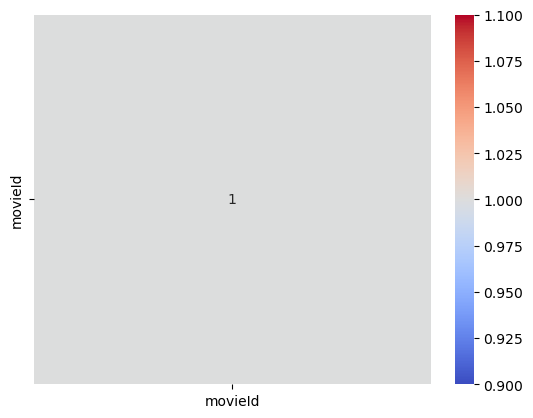

In [16]:
import seaborn as sns
corr_matrix = new_movies.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [17]:
# Similar movies like Forrest Gump
corr_forrestgump.sort_values('Correlation', ascending = False).head(10)
corr_forrestgump = corr_forrestgump.join(ratings['num of ratings'])
corr_forrestgump.head()
corr_forrestgump[corr_forrestgump['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Forrest Gump,1.000000,329
Good Will Hunting,0.484042,141
Aladdin,0.464268,183
American History X,0.457287,129
"Truman Show, The",0.432556,125


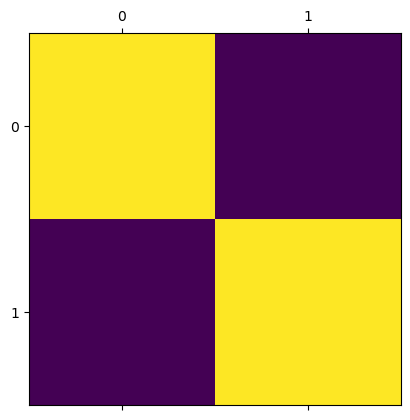

In [18]:
plt.matshow(corr_forrestgump.corr())
plt.show()

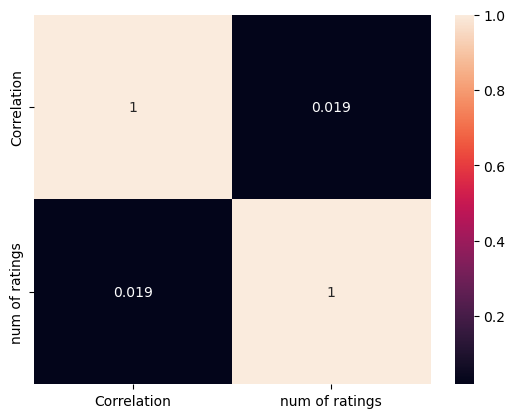

In [19]:
corr_matrix = corr_forrestgump.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()